In [3]:
# 바이너리 인코딩 예시
!pip install category_encoders
import pandas as pd
import numpy as np
import category_encoders as ce

# 샘플 데이터 생성
data = {
    'color': ['red', 'blue', 'green', 'yellow', 'white']
}
df = pd.DataFrame(data)

# 바이너리 인코더 생성
encoder = ce.BinaryEncoder(cols=['color'], return_df=True)

# 데이터에 대한 바이너리 인코딩 수행
df_encoded = encoder.fit_transform(df)

# 결과 출력
print(df_encoded)

   color_0  color_1  color_2
0        0        0        1
1        0        1        0
2        0        1        1
3        1        0        0
4        1        0        1


In [4]:
# 더미형 인코딩 예시
import pandas as pd

# 샘플 데이터 생성
data = {
    'color': ['red', 'blue', 'green', 'yellow', 'white']
}
df = pd.DataFrame(data)

# 더미형 인코딩 수행
df_dummies = pd.get_dummies(df, columns=['color'])

# 결과 출력
print(df_dummies)


   color_blue  color_green  color_red  color_white  color_yellow
0           0            0          1            0             0
1           1            0          0            0             0
2           0            1          0            0             0
3           0            0          0            0             1
4           0            0          0            1             0


In [5]:
# 정수형 인코딩 예시
import pandas as pd

# 샘플 데이터 생성
data = {
    'color': ['red', 'blue', 'green', 'yellow', 'white']
}
df = pd.DataFrame(data)

# 정수형 인코딩 수행
df['color_encoded'] = df['color'].astype('category').cat.codes

# 결과 출력
print(df)


    color  color_encoded
0     red              2
1    blue              0
2   green              1
3  yellow              4
4   white              3


In [6]:
import pandas as pd
import numpy as np
import platform
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc
%matplotlib inline
warnings.filterwarnings(action="ignore")

path = "C:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangeul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangeul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")

# 음수일때 오류 나는것 방지
plt.rcParams["axes.unicode_minus"] = False

Hangeul OK in your Windows!!!


In [7]:
# 정수형 인코딩 파일에 정수로 변환이 안되어있음
df_int = pd.read_csv("./google_int.csv", index_col=0)
df_int

,Category,Rating,Reviews,Size,Installs,Free,Price,Available_age,Genres
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2600000.0,500,0,0.0,0,Education
10836,FAMILY,4.5,38,53000000.0,5000,0,0.0,0,Education
10837,FAMILY,5.0,4,3600000.0,100,0,0.0,0,Education
10839,BOOKS_AND_REFERENCE,4.5,114,3600000.0,1000,0,0.0,2,Books & Reference


In [8]:
# 카테고리 정수형 변환
df_int["category_i"] = df_int["Category"].astype("category").cat.codes
df_int["Genres_i"] = df_int["Genres"].astype("category").cat.codes
df_int

,Category,Rating,Reviews,Size,Installs,Free,Price,Available_age,Genres,category_i,Genres_i
0,ART_AND_DESIGN,4.1,159,19000000.0,10000,0,0.0,0,Art & Design,0,9
1,ART_AND_DESIGN,3.9,967,14000000.0,500000,0,0.0,0,Art & Design;Pretend Play,0,11
2,ART_AND_DESIGN,4.7,87510,8700000.0,5000000,0,0.0,0,Art & Design,0,9
3,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,0,0.0,1,Art & Design,0,9
4,ART_AND_DESIGN,4.3,967,2800000.0,100000,0,0.0,0,Art & Design;Creativity,0,10
...,...,...,...,...,...,...,...,...,...,...,...
10834,FAMILY,4.0,7,2600000.0,500,0,0.0,0,Education,11,37
10836,FAMILY,4.5,38,53000000.0,5000,0,0.0,0,Education,11,37
10837,FAMILY,5.0,4,3600000.0,100,0,0.0,0,Education,11,37
10839,BOOKS_AND_REFERENCE,4.5,114,3600000.0,1000,0,0.0,2,Books & Reference,3,18


In [9]:
np.unique(df_int["Category"])

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FAMILY',
       'FINANCE', 'FOOD_AND_DRINK', 'GAME', 'HEALTH_AND_FITNESS',
       'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE',
       'MAPS_AND_NAVIGATION', 'MEDICAL', 'NEWS_AND_MAGAZINES',
       'PARENTING', 'PERSONALIZATION', 'PHOTOGRAPHY', 'PRODUCTIVITY',
       'SHOPPING', 'SOCIAL', 'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL',
       'VIDEO_PLAYERS', 'WEATHER'], dtype=object)

In [10]:
np.unique(df_int["Genres"])

array(['Action', 'Action;Action & Adventure', 'Adventure',
       'Adventure;Action & Adventure', 'Adventure;Brain Games',
       'Adventure;Education', 'Arcade', 'Arcade;Action & Adventure',
       'Arcade;Pretend Play', 'Art & Design', 'Art & Design;Creativity',
       'Art & Design;Pretend Play', 'Auto & Vehicles', 'Beauty', 'Board',
       'Board;Action & Adventure', 'Board;Brain Games',
       'Board;Pretend Play', 'Books & Reference',
       'Books & Reference;Education', 'Business', 'Card',
       'Card;Action & Adventure', 'Card;Brain Games', 'Casino', 'Casual',
       'Casual;Action & Adventure', 'Casual;Brain Games',
       'Casual;Creativity', 'Casual;Education', 'Casual;Music & Video',
       'Casual;Pretend Play', 'Comics', 'Comics;Creativity',
       'Communication', 'Communication;Creativity', 'Dating', 'Education',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Creativity', 'Education;Education',
       'Education;Music & Video', 'Educ

In [11]:
# 바이너리 인코딩 사용 => 카테고리값은 2^6 = 64개까지 표현가능 / 장르값은 2^7 = 128개까지 표현가능
df_bin = pd.read_csv("./google_bin.csv", index_col=0)
df_bin

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Rating,Reviews,Size,Installs,Free,Price,Available_age,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,0,0,0,0,0,1,4.1,159,19000000.0,10000,0,0.0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,3.9,967,14000000.0,500000,0,0.0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,4.7,87510,8700000.0,5000000,0,0.0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,4.5,215644,25000000.0,50000000,0,0.0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,4.3,967,2800000.0,100000,0,0.0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,1,0,0,1,1,4.0,7,2600000.0,500,0,0.0,0,0,0,0,1,1,0,1
10836,0,1,0,0,1,1,4.5,38,53000000.0,5000,0,0.0,0,0,0,0,1,1,0,1
10837,0,1,0,0,1,1,5.0,4,3600000.0,100,0,0.0,0,0,0,0,1,1,0,1
10839,0,0,0,1,0,0,4.5,114,3600000.0,1000,0,0.0,2,0,0,0,0,1,1,0


In [12]:
df_dummy = pd.read_csv("./google_dummy.csv", index_col=0)
df_dummy

,Rating,Reviews,Size,Installs,Free,Price,Available_age,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,19000000.0,10000,0,0.0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.9,967,14000000.0,500000,0,0.0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.7,87510,8700000.0,5000000,0,0.0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4.5,215644,25000000.0,50000000,0,0.0,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4.3,967,2800000.0,100000,0,0.0,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2600000.0,500,0,0.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10836,4.5,38,53000000.0,5000,0,0.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10837,5.0,4,3600000.0,100,0,0.0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10839,4.5,114,3600000.0,1000,0,0.0,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
df_dummy.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Free', 'Price',
       'Available_age', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=155)

In [14]:
# 불리언 값으로 되어있는 더미값을 정수형으로 변환
df_dummy.iloc[:, 7:] = df_dummy.iloc[:, 7:].astype("int")
df_dummy

,Rating,Reviews,Size,Installs,Free,Price,Available_age,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,19000000.0,10000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2600000.0,500,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38,53000000.0,5000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4,3600000.0,100,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114,3600000.0,1000,0,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler

def trans_standard_scaler(X):
    # 특성 객체만 numpy 배열로 변환
    np_X = X.to_numpy()
    np_X

    ss = StandardScaler()
    X_ss = ss.fit_transform(np_X)
    
    return X_ss

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

def print_crossValidate(model, X, y):
    kfold = KFold(n_splits=5)

    # 교차 검증을 위한 설정
    scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_squared_log_error']
    
    # `cross_validate` 함수를 사용하여 교차 검증 수행
    model_scores = cross_validate(model, X, y, scoring=scoring, cv=kfold, return_train_score=False)
    # 평균값을 오차값으로 사용
    model_mean_mse = -np.mean(model_scores['test_neg_mean_squared_error'])
    model_mean_mae = -np.mean(model_scores['test_neg_mean_absolute_error'])
    model_mean_msle = -np.mean(model_scores['test_neg_mean_squared_log_error'])

    print(f"Average test MSE: {model_mean_mse:.4f}")
    print(f"Average test MAE: {model_mean_mae:.4f}")
    print(f"Average test MSLE: {model_mean_msle:.4f}")

    return model_mean_mse, model_mean_mae, model_mean_msle


In [17]:
# 오차값을 dataframe에 넣기위한 dict
def Evaluationmatrix_dict(model_mean_mse, model_mean_mae, model_mean_msle, name = 'Linear - Integer'):
    dict_matrix = {}
    dict_matrix['Series Name'] = name
    dict_matrix['Mean Squared Error'] = model_mean_mse
    dict_matrix['Mean Absolute Error'] = model_mean_mae
    dict_matrix['Mean Squared Log Error'] = model_mean_msle
    return dict_matrix

In [18]:
# 장르 제외 => linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 정수형 인코딩
X = df_int.drop(columns=['Category', 'Rating', 'Genres', 'Genres_i'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_test_lr = lr.predict(X_test)

mse_lr_i, mae_lr_i, msle_lr_i = print_crossValidate(lr, X, y)

# 성능 지표 dict에 넣기
resultsdf = pd.DataFrame()
resultsdf = resultsdf.from_dict(Evaluationmatrix_dict(mse_lr_i, mae_lr_i, msle_lr_i), orient = 'index')
resultsdf = resultsdf.transpose()

Average test MSE: 0.2689
Average test MAE: 0.3653
Average test MSLE: 0.0131


In [19]:
# 더미형은 차원이 너무 커서 성능이 안좋고, 시간이 오래 걸림
df_dummy

,Rating,Reviews,Size,Installs,Free,Price,Available_age,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159,19000000.0,10000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14000000.0,500000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8700000.0,5000000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25000000.0,50000000,0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2800000.0,100000,0,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,7,2600000.0,500,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10836,4.5,38,53000000.0,5000,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10837,5.0,4,3600000.0,100,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10839,4.5,114,3600000.0,1000,0,0.0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# 장르 제외, 바이너리형 인코딩
X_b = df_bin.drop(columns=['Rating', 'Genres_0', 'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train_b, y_train_b)
y_pred_test_lr_b = lr.predict(X_test_b)

mse_lr_b, mae_lr_b, msle_lr_b = print_crossValidate(lr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_lr_b, mae_lr_b, msle_lr_b, name = 'Linear - Binary'), ignore_index = True)

Average test MSE: 0.2734
Average test MAE: 0.3712
Average test MSLE: 0.0133


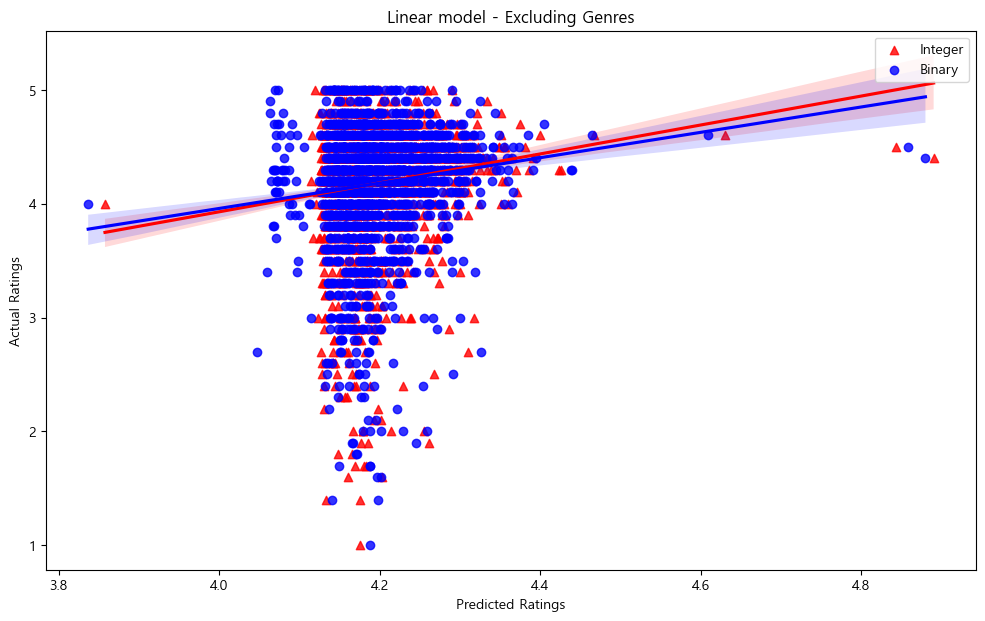

In [21]:
# 장르 제외 선형 회귀 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_lr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_lr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('Linear model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [22]:
# 장르 포함
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# 정수형 인코딩
X = df_int.drop(columns=['Category', 'Rating', 'Genres'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)
y_pred_test_lr = lr.predict(X_test)

mse_lr_i, mae_lr_i, msle_lr_i = print_crossValidate(lr, X, y)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_lr_i, mae_lr_i, msle_lr_i, name='Linear(inc Genres) - Integer'), ignore_index=True)

Average test MSE: 0.2687
Average test MAE: 0.3652
Average test MSLE: 0.0131


In [23]:
df_bin

,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Rating,Reviews,Size,Installs,Free,Price,Available_age,Genres_0,Genres_1,Genres_2,Genres_3,Genres_4,Genres_5,Genres_6
0,0,0,0,0,0,1,4.1,159,19000000.0,10000,0,0.0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,3.9,967,14000000.0,500000,0,0.0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,4.7,87510,8700000.0,5000000,0,0.0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,4.5,215644,25000000.0,50000000,0,0.0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,1,4.3,967,2800000.0,100000,0,0.0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,1,0,0,1,1,4.0,7,2600000.0,500,0,0.0,0,0,0,0,1,1,0,1
10836,0,1,0,0,1,1,4.5,38,53000000.0,5000,0,0.0,0,0,0,0,1,1,0,1
10837,0,1,0,0,1,1,5.0,4,3600000.0,100,0,0.0,0,0,0,0,1,1,0,1
10839,0,0,0,1,0,0,4.5,114,3600000.0,1000,0,0.0,2,0,0,0,0,1,1,0


In [24]:
# 장르 포함, 바이너리형 인코딩
X_b = df_bin.drop(columns=['Rating'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

lr = LinearRegression(n_jobs=-1)
lr.fit(X_train_b, y_train_b)
y_pred_test_lr_b = lr.predict(X_test_b)

mse_lr_b, mae_lr_b, msle_lr_b = print_crossValidate(lr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_lr_b, mae_lr_b, msle_lr_b, name = 'Linear(inc Genres) - Binary'), ignore_index = True)

Average test MSE: 0.2714
Average test MAE: 0.3710
Average test MSLE: 0.0132


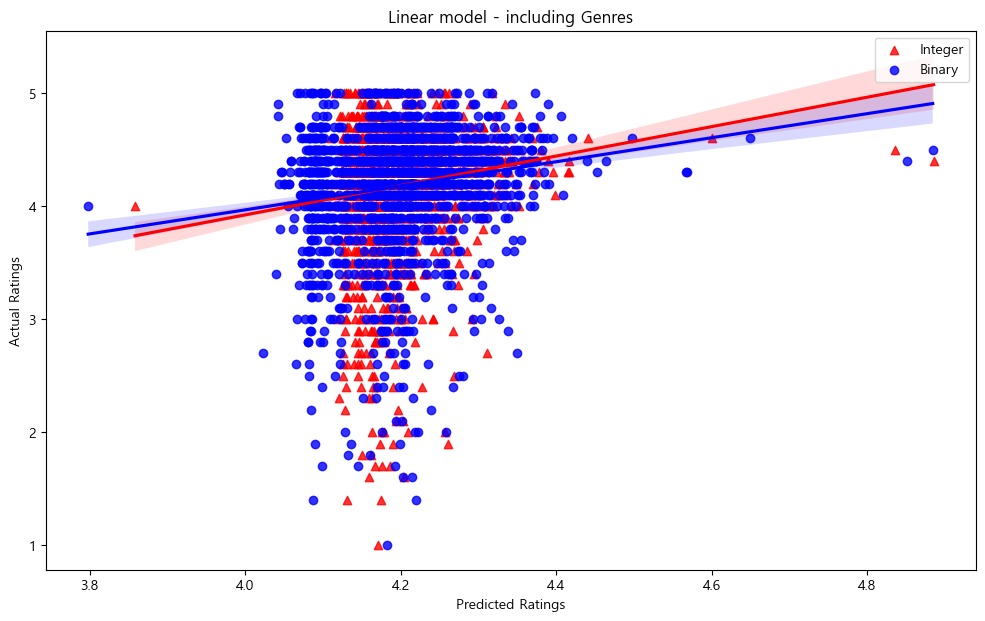

In [25]:
# 장르 포함 선형 회귀 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_lr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_lr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('Linear model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [26]:
# 장르 제외 => support vector regressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split


# 정수형 인코딩
X = df_int.drop(columns=['Category', 'Rating', 'Genres', 'Genres_i'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred_test_svr = svr.predict(X_test)

mse_svr_i, mae_svr_i, msle_svr_i = print_crossValidate(svr, X, y)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_svr_i, mae_svr_i, msle_svr_i, name='SVR - Integer'), ignore_index=True)

Average test MSE: 0.2756
Average test MAE: 0.3519
Average test MSLE: 0.0136


In [27]:
# 장르 제외, 바이너리형 인코딩
X_b = df_bin.drop(columns=['Rating', 'Genres_0', 'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train_b, y_train_b)
y_pred_test_svr_b = svr.predict(X_test_b)

mse_svr_b, mae_svr_b, msle_svr_b = print_crossValidate(svr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_svr_b, mae_svr_b, msle_svr_b, name = 'SVR - Binary'), ignore_index = True)

Average test MSE: 0.2750
Average test MAE: 0.3536
Average test MSLE: 0.0135


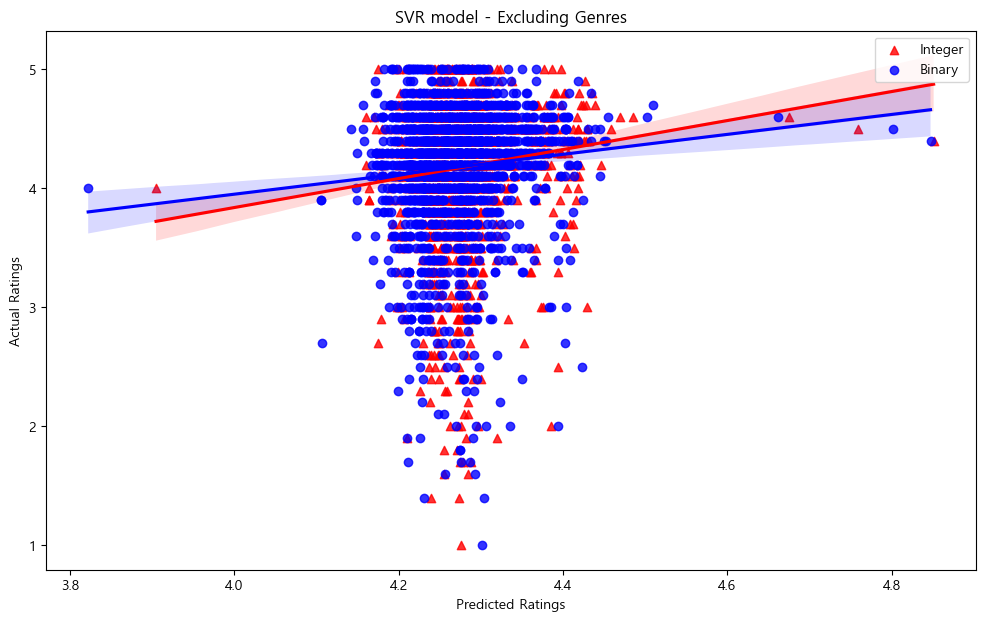

In [28]:
# 장르 제외 SVR 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_svr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_svr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('SVR model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [29]:
# 장르 포함 정수형 인코딩 => SVR
X = df_int.drop(columns=['Category', 'Rating', 'Genres'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)
y_pred_test_svr = svr.predict(X_test)

mse_svr_i, mae_svr_i, msle_svr_i = print_crossValidate(svr, X, y)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_svr_i, mae_svr_i, msle_svr_i, name='SVR(inc Genres) - Integer'), ignore_index=True)

Average test MSE: 0.2758
Average test MAE: 0.3525
Average test MSLE: 0.0136


In [30]:
# 장르 포함, 바이너리형 인코딩 => SVR
X_b = df_bin.drop(columns=['Rating'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train_b, y_train_b)
y_pred_test_svr_b = svr.predict(X_test_b)

mse_svr_b, mae_svr_b, msle_svr_b = print_crossValidate(svr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_svr_b, mae_svr_b, msle_svr_b, name = 'SVR(inc Genres) - Binary'), ignore_index = True)

Average test MSE: 0.2719
Average test MAE: 0.3513
Average test MSLE: 0.0134


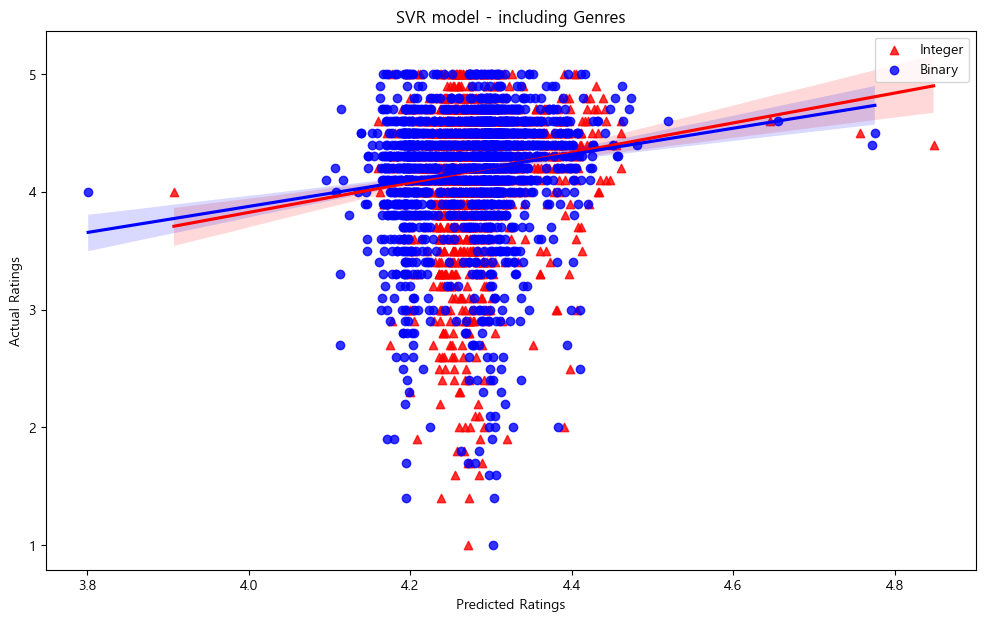

In [31]:
# 장르 포함 SVR 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_svr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_svr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('SVR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [32]:
# 장르 제외 => Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# 정수형 인코딩
X = df_int.drop(columns=['Category', 'Rating', 'Genres', 'Genres_i'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=13)
rfr.fit(X_train, y_train)
y_pred_test_rfr = rfr.predict(X_test)

mse_rfr_i, mae_rfr_i, msle_rfr_i = print_crossValidate(rfr, X, y)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_rfr_i, mae_rfr_i, msle_rfr_i, name='RFR - Integer'), ignore_index=True)

Average test MSE: 0.2355
Average test MAE: 0.3339
Average test MSLE: 0.0118


<Figure size 1400x1000 with 0 Axes>

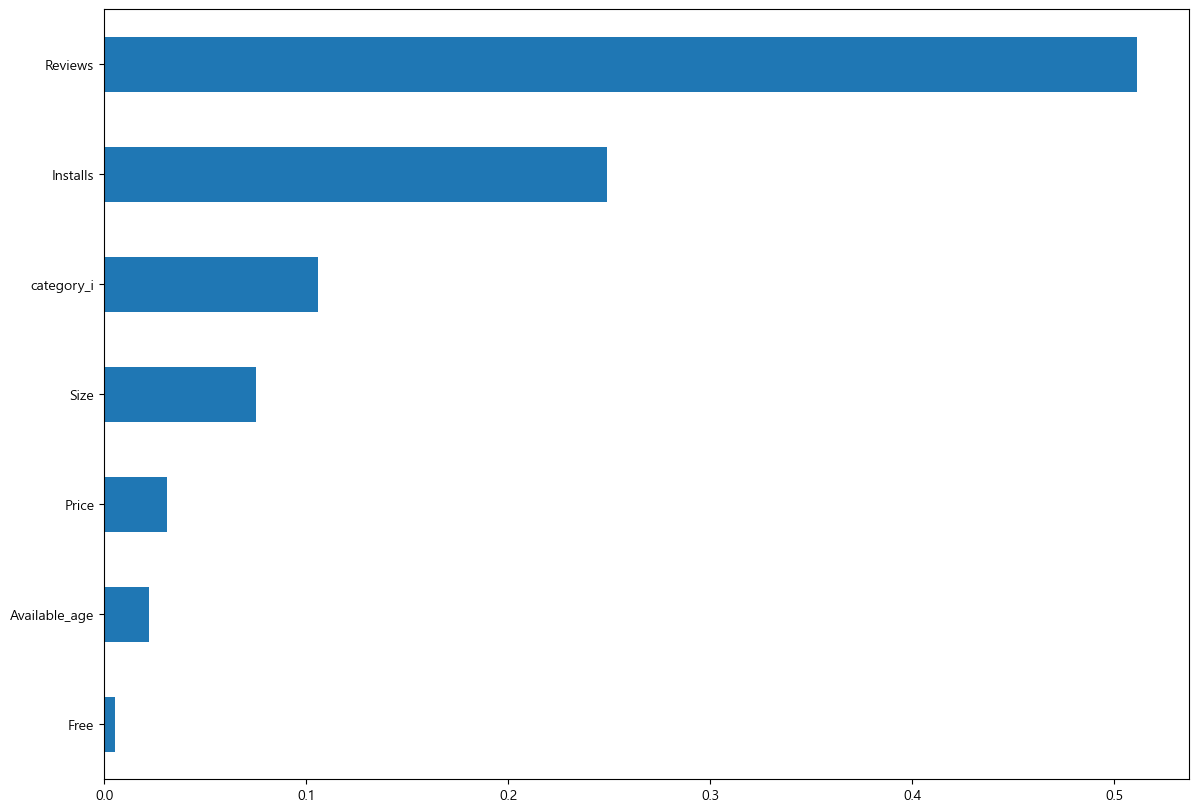

In [33]:
#  RFR 정수형 인코딩 중에서 특성의 중요도를 보자 (장르 제외)
X = df_int.drop(columns=['Category', 'Rating', 'Genres', 'Genres_i'], axis=1)
Feat_impt = {}
for col,feat in zip(X.columns, rfr.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

In [34]:
# 장르 제외, 바이너리형 인코딩 => RFR
X_b = df_bin.drop(columns=['Rating', 'Genres_0', 'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=13)
rfr.fit(X_train_b, y_train_b)
y_pred_test_rfr_b = rfr.predict(X_test_b)

mse_rfr_b, mae_rfr_b, msle_rfr_b = print_crossValidate(rfr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_rfr_b, mae_rfr_b, msle_rfr_b, name = 'RFR - Binary'), ignore_index = True)

Average test MSE: 0.2346
Average test MAE: 0.3332
Average test MSLE: 0.0117


<Figure size 1400x1000 with 0 Axes>

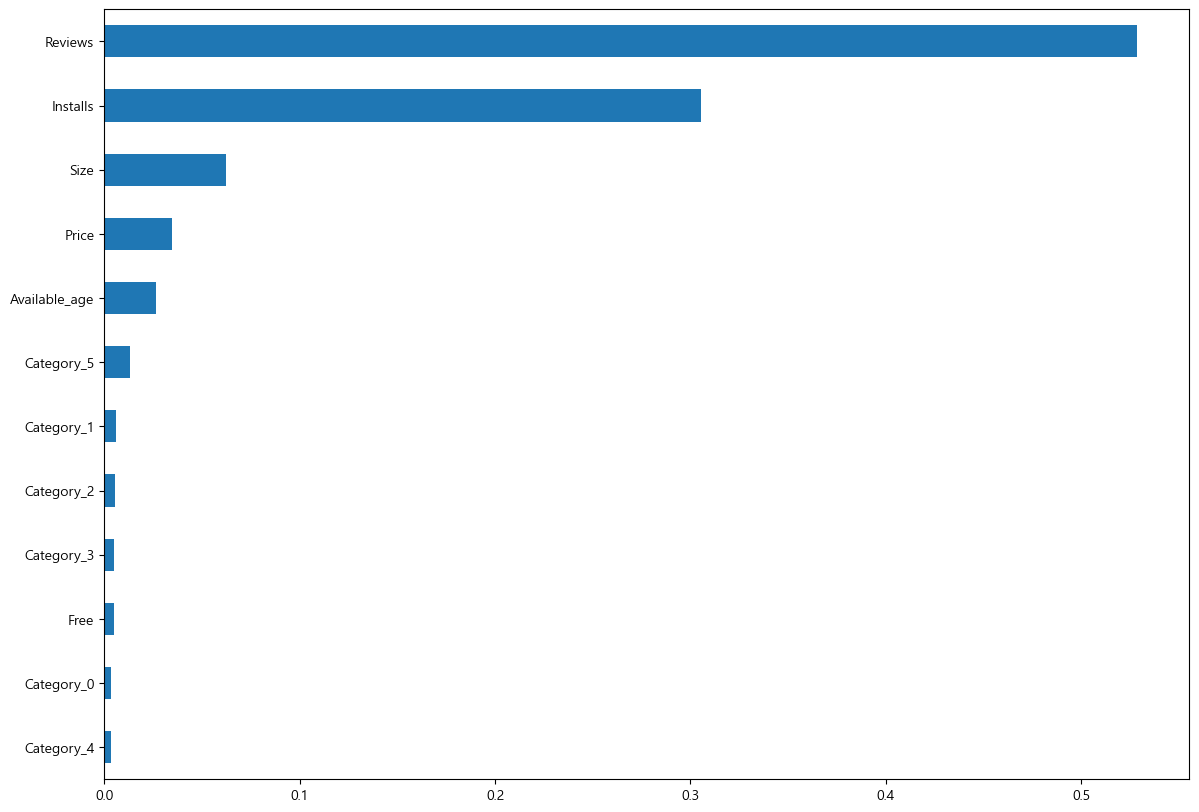

In [35]:
# RFR 바이너리 인코딩 중에서 특성의 중요도를 봐보자 (장르 제외)
X_b = df_bin.drop(columns=['Rating', 'Genres_0', 'Genres_1', 'Genres_2', 'Genres_3', 'Genres_4', 'Genres_5', 'Genres_6'], axis=1)
Feat_impt_b = {}
for col,feat in zip(X_b.columns, rfr.feature_importances_):
    Feat_impt_b[col] = feat

Feat_impt_df_b = pd.DataFrame.from_dict(Feat_impt_b,orient = 'index')
Feat_impt_df_b.sort_values(by = 0, inplace = True)
Feat_impt_df_b.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_b.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

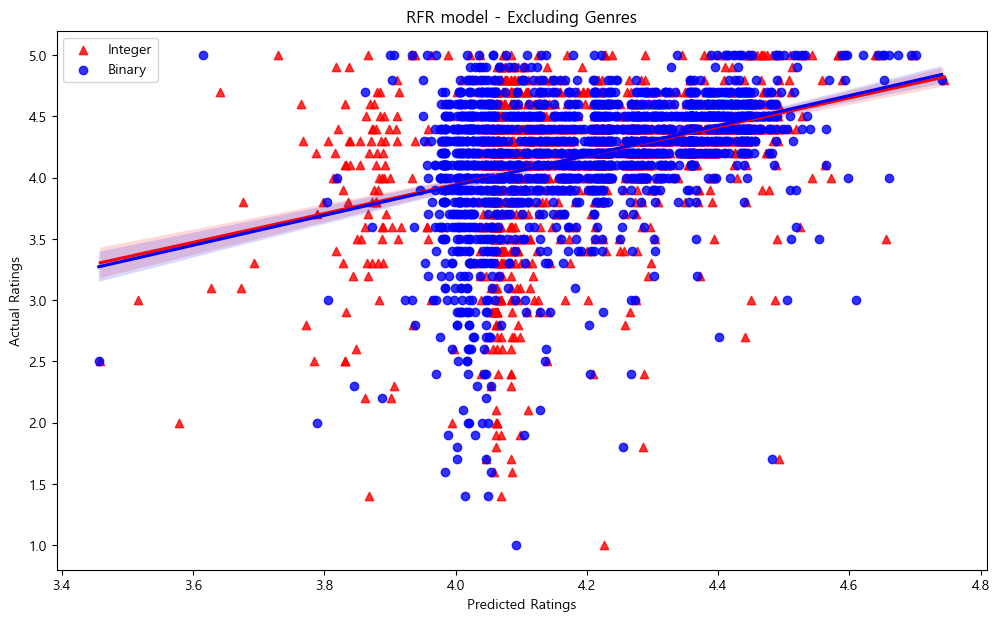

In [36]:
# 장르 제외 RFR 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_rfr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_rfr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('RFR model - Excluding Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [37]:
# 장르 포함 정수형 인코딩 => RFR
X = df_int.drop(columns=['Category', 'Rating', 'Genres'], axis=1)
y = df_int["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X = trans_standard_scaler(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=13)
rfr.fit(X_train, y_train)
y_pred_test_rfr = rfr.predict(X_test)

mse_rfr_i, mae_rfr_i, msle_rfr_i = print_crossValidate(rfr, X, y)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_rfr_i, mae_rfr_i, msle_rfr_i, name='RFR(inc Genres) - Integer'), ignore_index=True)

Average test MSE: 0.2361
Average test MAE: 0.3342
Average test MSLE: 0.0118


<Figure size 1400x1000 with 0 Axes>

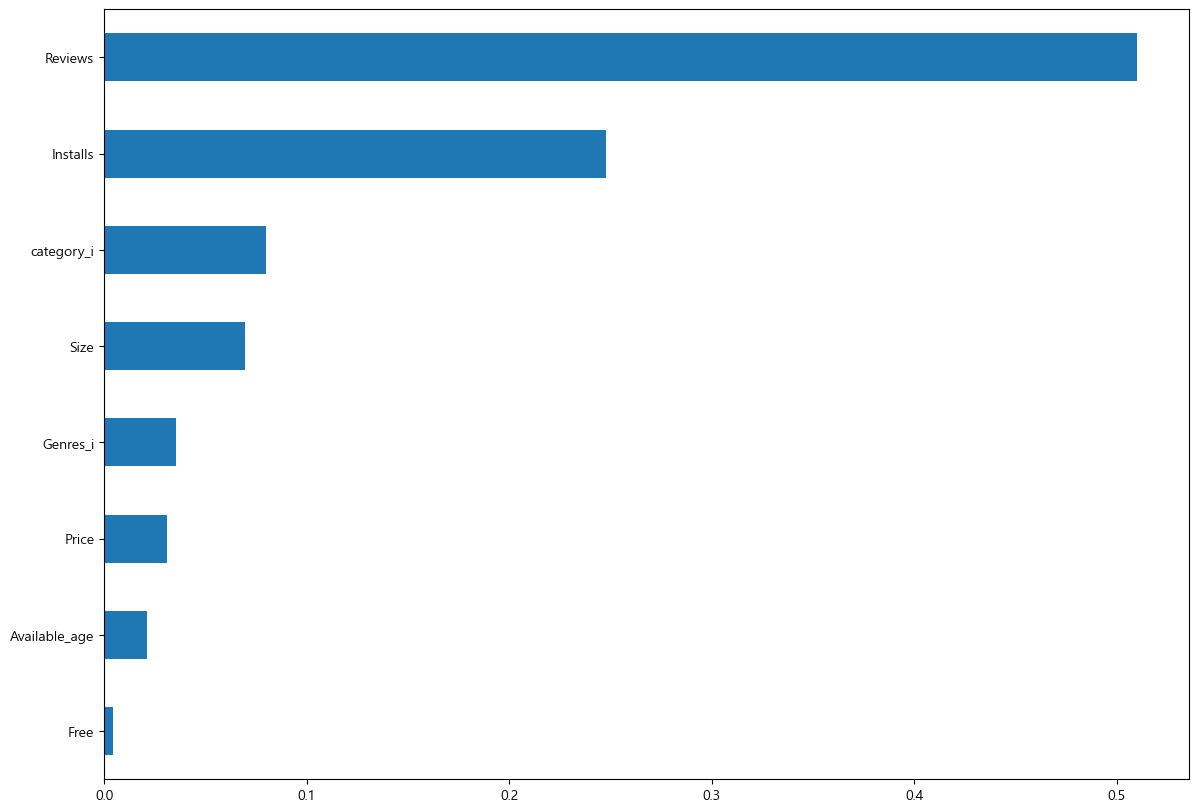

In [38]:
#  RFR 정수형 인코딩 중에서 특성의 중요도를 보자 (장르 포함)
X = df_int.drop(columns=['Category', 'Rating', 'Genres'], axis=1)
Feat_impt = {}
for col,feat in zip(X.columns, rfr.feature_importances_):
    Feat_impt[col] = feat

Feat_impt_df = pd.DataFrame.from_dict(Feat_impt,orient = 'index')
Feat_impt_df.sort_values(by = 0, inplace = True)
Feat_impt_df.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

In [39]:
# 장르 포함, 바이너리형 인코딩 => RFR
X_b = df_bin.drop(columns=['Rating'], axis=1)
y_b = df_bin["Rating"]

# 특성 값 간의 척도 차이가 커서 정규화 함
X_b = trans_standard_scaler(X_b)

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.2, random_state=13)

rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=13)
rfr.fit(X_train_b, y_train_b)
y_pred_test_rfr_b = rfr.predict(X_test_b)

mse_rfr_b, mae_rfr_b, msle_rfr_b = print_crossValidate(rfr, X_b, y_b)

# 성능 지표 dict에 넣기
resultsdf = resultsdf.append(Evaluationmatrix_dict(mse_rfr_b, mae_rfr_b, msle_rfr_b, name = 'RFR(inc Genres) - Binary'), ignore_index = True)

Average test MSE: 0.2347
Average test MAE: 0.3334
Average test MSLE: 0.0117


<Figure size 1400x1000 with 0 Axes>

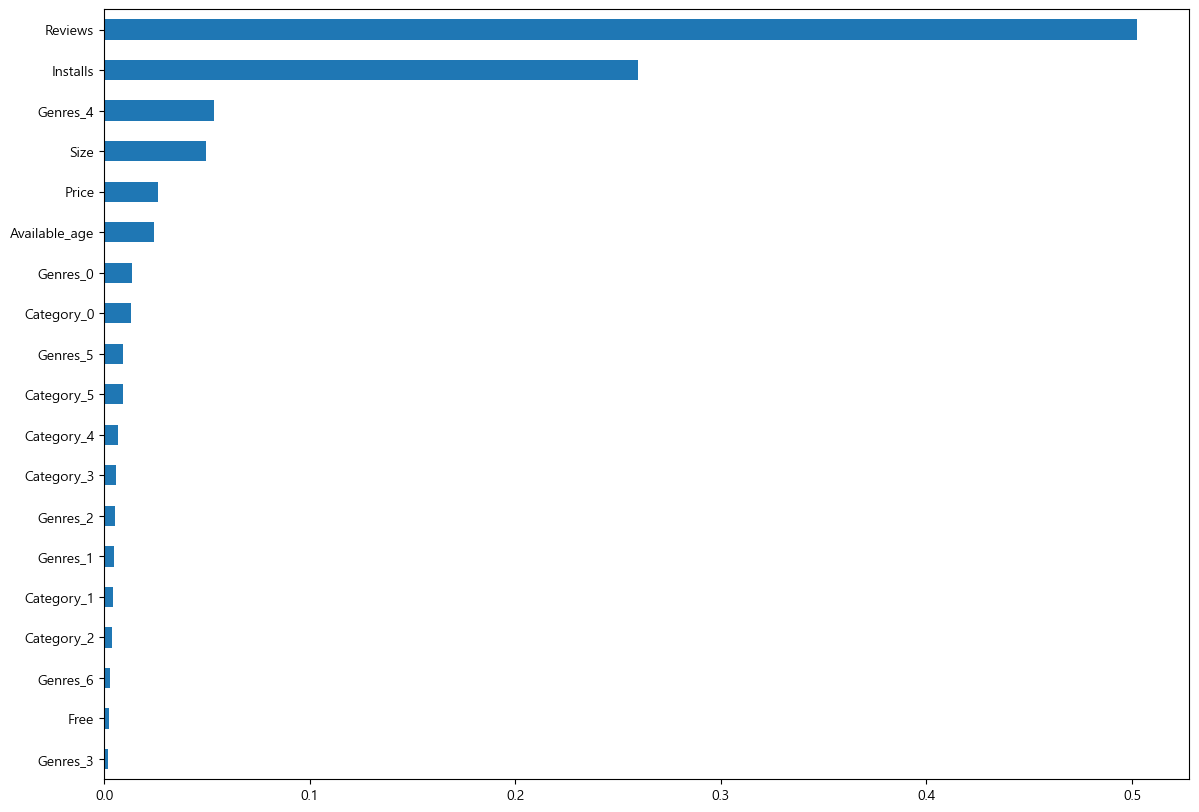

In [40]:
# RFR 바이너리 인코딩 중에서 특성의 중요도를 봐보자 (장르 포함)
X_b = df_bin.drop(columns=['Rating'], axis=1)
Feat_impt_b = {}
for col,feat in zip(X_b.columns, rfr.feature_importances_):
    Feat_impt_b[col] = feat

Feat_impt_df_b = pd.DataFrame.from_dict(Feat_impt_b,orient = 'index')
Feat_impt_df_b.sort_values(by = 0, inplace = True)
Feat_impt_df_b.rename(index = str, columns = {0:'Pct'},inplace = True)

plt.figure(figsize= (14,10))
Feat_impt_df_b.plot(kind = 'barh',figsize= (14,10),legend = False)
plt.show()

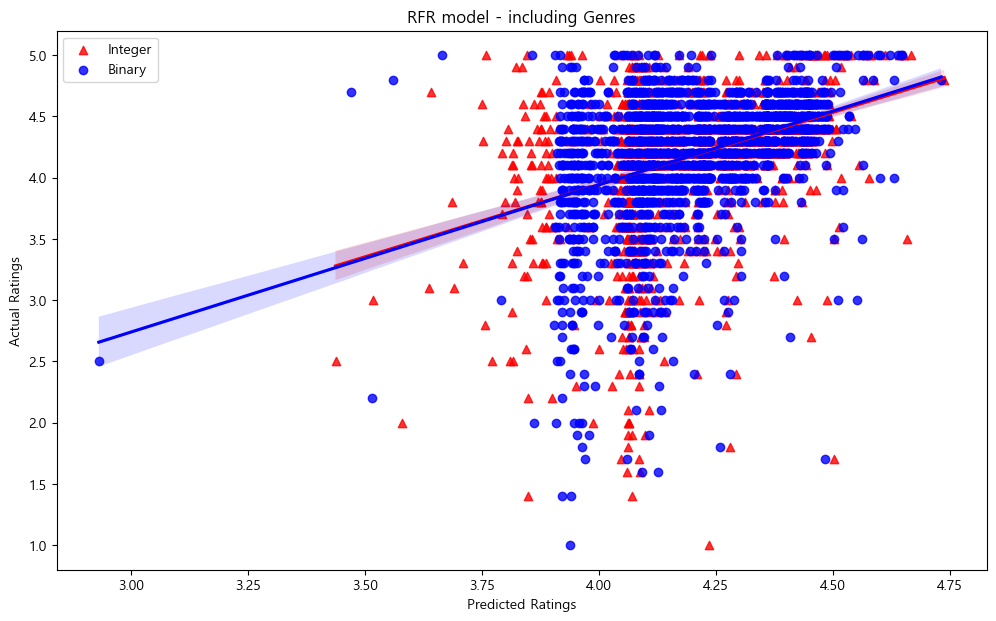

In [41]:
# 장르 포함 RFR 그래프
plt.figure(figsize=(12,7))
sns.regplot(x=y_pred_test_rfr, y=y_test, color='red', label = 'Integer', marker = '^')
sns.regplot(x=y_pred_test_rfr_b, y=y_test_b, color='blue', label = 'Binary')
plt.legend()
plt.title('RFR model - including Genres')
plt.xlabel('Predicted Ratings')
plt.ylabel('Actual Ratings')
plt.show()

In [42]:
resultsdf

,Series Name,Mean Squared Error,Mean Absolute Error,Mean Squared Log Error
0,Linear - Integer,0.26891,0.365315,0.013148
1,Linear - Binary,0.273403,0.371228,0.013312
2,Linear(inc Genres) - Integer,0.268686,0.365239,0.013138
3,Linear(inc Genres) - Binary,0.271424,0.370956,0.013214
4,SVR - Integer,0.275626,0.351935,0.01359
5,SVR - Binary,0.274997,0.353599,0.013546
6,SVR(inc Genres) - Integer,0.275805,0.352462,0.013598
7,SVR(inc Genres) - Binary,0.271875,0.351336,0.013432
8,RFR - Integer,0.235505,0.333877,0.011758
9,RFR - Binary,0.23465,0.333179,0.011701


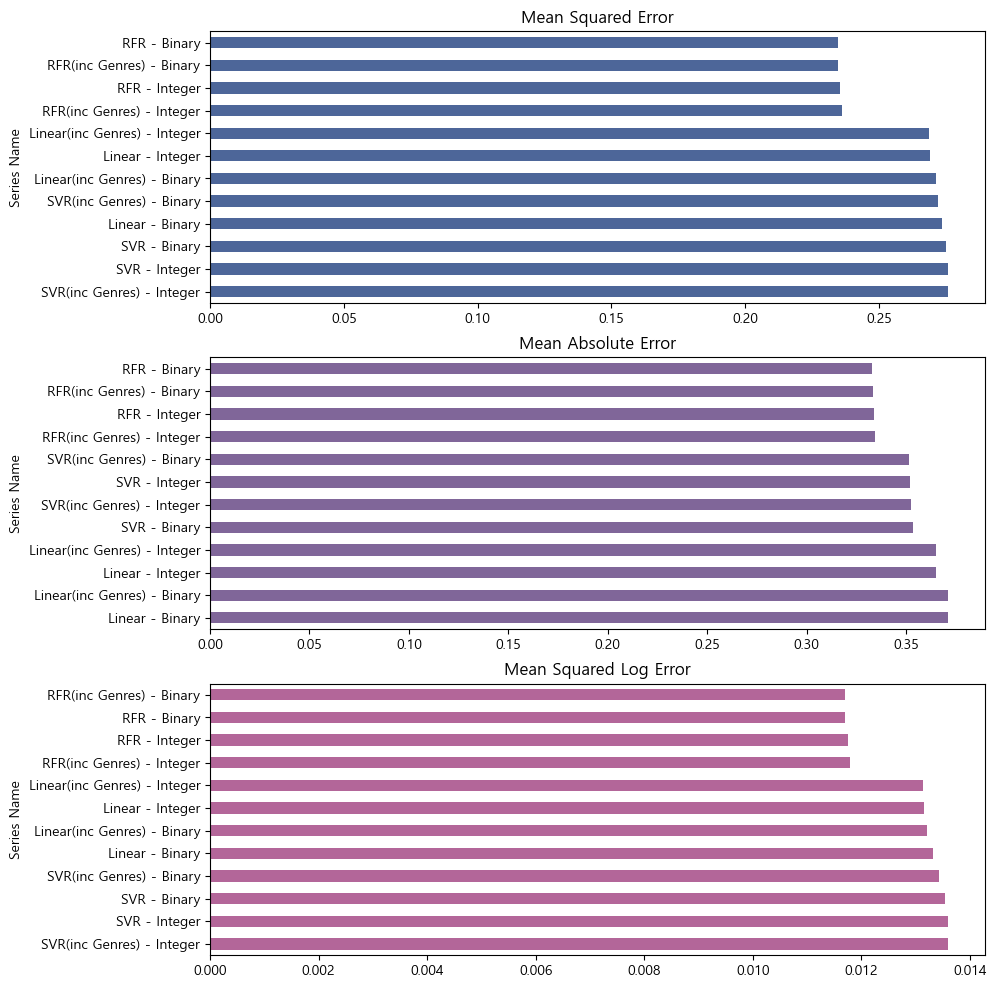

In [43]:
# 성능지표 나타내기
resultsdf.set_index('Series Name', inplace = True)

plt.figure(figsize = (10,12))
plt.subplot(3,1,1)
resultsdf['Mean Squared Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.3, 0.4, 0.6, 1), title = 'Mean Squared Error')
plt.subplot(3,1,2)
resultsdf['Mean Absolute Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.5, 0.4, 0.6, 1), title = 'Mean Absolute Error')
plt.subplot(3,1,3)
resultsdf['Mean Squared Log Error'].sort_values(ascending = False).plot(kind = 'barh',color=(0.7, 0.4, 0.6, 1), title = 'Mean Squared Log Error')
plt.show()